In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
raw_data = pd.read_csv('data/subset3.csv', encoding_errors='replace')

In [4]:
inter_data = raw_data[['SURVEYR', 
                       'BYCOND',
                       'DESCRIP_E',
                       'DEMCODE',
                       'TITLE_E',
                       'SCORE100',
                       'AGREE',
                       'ANSCOUNT',
                       'SUBINDICATORENG',
                       'DEPT_E']]

In [5]:
inter_data

,SURVEYR,BYCOND,DESCRIP_E,DEMCODE,TITLE_E,SCORE100,AGREE,ANSCOUNT,SUBINDICATORENG,DEPT_E
0,2020,Q115 = 1,Male gender,2011,"Question 1. I have the tools, technology and e...",75,81,73497,Physical environment and equipment,Public Service
1,2020,Q115 = 1,Male gender,2011,"Question 1. I have the tools, technology and e...",79,85,11550,Physical environment and equipment,Canada Revenue Agency
2,2020,Q115 = 1,Male gender,2011,"Question 1. I have the tools, technology and e...",80,87,5626,Physical environment and equipment,Employment and Social Development Canada
3,2020,Q115 = 1,Male gender,2011,"Question 1. I have the tools, technology and e...",72,78,7308,Physical environment and equipment,Department of National Defence
4,2020,Q115 = 1,Male gender,2011,"Question 1. I have the tools, technology and e...",64,67,3252,Physical environment and equipment,Correctional Service Canada
...,...,...,...,...,...,...,...,...,...,...
1405574,2018,Q122 = 5,Prefer not to answer,2069,Question 97. To what extent have issues with t...,82,12,56,Pay or other compensation issues,Administrative Tribunals Support Service of Ca...
1405575,2018,Q122 = 5,Prefer not to answer,2069,Question 97. To what extent have issues with t...,81,15,35,Pay or other compensation issues,National Film Board of Canada
1405576,2018,Q122 = 5,Prefer not to answer,2069,Question 97. To what extent have issues with t...,82,6,33,Pay or other compensation issues,Federal Economic Development Agency for Southe...
1405577,2018,Q122 = 5,Prefer not to answer,2069,Question 97. To what extent have issues with t...,80,13,39,Pay or other compensation issues,Statistical Survey Operations


In [6]:
def clean_score(score):
    if score == '9999':
        return None
    else:
        return score

In [7]:
inter_data['SCORE100'] = inter_data['SCORE100'].map(lambda score: clean_score(score))
inter_data['AGREE'] = inter_data['AGREE'].map(lambda score: clean_score(score))

C:\Users\micha\AppData\Local\Temp\ipykernel_25880\3699602476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inter_data['SCORE100'] = inter_data['SCORE100'].map(lambda score: clean_score(score))
C:\Users\micha\AppData\Local\Temp\ipykernel_25880\3699602476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inter_data['AGREE'] = inter_data['AGREE'].map(lambda score: clean_score(score))


In [8]:
def global_score(row):
    if row['AGREE'] is None and row['SCORE100'] is not None:
        return row['SCORE100']
    if row['SCORE100'] is None and row['AGREE'] is not None:
        return row['AGREE']
    if row['SCORE100'] is not None and row['AGREE'] is not None:
        return row['SCORE100']
    return 'error'

In [9]:
inter_data['score'] = inter_data.apply(lambda row: global_score(row), axis=1)

C:\Users\micha\AppData\Local\Temp\ipykernel_25880\923063142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inter_data['score'] = inter_data.apply(lambda row: global_score(row), axis=1)


In [10]:
inter_data.loc[inter_data['score'] == 'error'].TITLE_E.unique()

array(['Question 54. Please indicate your reason for leaving.'],
      dtype=object)

In [11]:
inter_data = inter_data.loc[inter_data['TITLE_E'] != 'Question 54. Please indicate your reason for leaving.']

In [12]:
inter_data = inter_data.rename(columns={'SURVEYR':'survey_year', 'DESCRIP_E': 'demographic', 'TITLE_E': 'question', 'ANSCOUNT': 'answer_count', 'SUBINDICATORENG':'subindicator', 'DEPT_E': 'department'})

In [13]:
inter_data = inter_data.drop(columns=['BYCOND', 'DEMCODE', 'SCORE100', 'AGREE'])

In [14]:
inter_data

,survey_year,demographic,question,answer_count,subindicator,department,score
0,2020,Male gender,"Question 1. I have the tools, technology and e...",73497,Physical environment and equipment,Public Service,75
1,2020,Male gender,"Question 1. I have the tools, technology and e...",11550,Physical environment and equipment,Canada Revenue Agency,79
2,2020,Male gender,"Question 1. I have the tools, technology and e...",5626,Physical environment and equipment,Employment and Social Development Canada,80
3,2020,Male gender,"Question 1. I have the tools, technology and e...",7308,Physical environment and equipment,Department of National Defence,72
4,2020,Male gender,"Question 1. I have the tools, technology and e...",3252,Physical environment and equipment,Correctional Service Canada,64
...,...,...,...,...,...,...,...
1405574,2018,Prefer not to answer,Question 97. To what extent have issues with t...,56,Pay or other compensation issues,Administrative Tribunals Support Service of Ca...,82
1405575,2018,Prefer not to answer,Question 97. To what extent have issues with t...,35,Pay or other compensation issues,National Film Board of Canada,81
1405576,2018,Prefer not to answer,Question 97. To what extent have issues with t...,33,Pay or other compensation issues,Federal Economic Development Agency for Southe...,82
1405577,2018,Prefer not to answer,Question 97. To what extent have issues with t...,39,Pay or other compensation issues,Statistical Survey Operations,80


In [15]:
inter_data['score'] = pd.to_numeric(inter_data['score'], errors='coerce')

In [16]:
inter_data = inter_data.loc[~inter_data['demographic'].str.contains('- Not selected')]

In [29]:
inter_data

,survey_year,demographic,question,answer_count,subindicator,department,score
0,2020,Male gender,"Question 1. I have the tools, technology and e...",73497,Physical environment and equipment,Public Service,75.0
1,2020,Male gender,"Question 1. I have the tools, technology and e...",11550,Physical environment and equipment,Canada Revenue Agency,79.0
2,2020,Male gender,"Question 1. I have the tools, technology and e...",5626,Physical environment and equipment,Employment and Social Development Canada,80.0
3,2020,Male gender,"Question 1. I have the tools, technology and e...",7308,Physical environment and equipment,Department of National Defence,72.0
4,2020,Male gender,"Question 1. I have the tools, technology and e...",3252,Physical environment and equipment,Correctional Service Canada,64.0
...,...,...,...,...,...,...,...
1405574,2018,Prefer not to answer,Question 97. To what extent have issues with t...,56,Pay or other compensation issues,Administrative Tribunals Support Service of Ca...,82.0
1405575,2018,Prefer not to answer,Question 97. To what extent have issues with t...,35,Pay or other compensation issues,National Film Board of Canada,81.0
1405576,2018,Prefer not to answer,Question 97. To what extent have issues with t...,33,Pay or other compensation issues,Federal Economic Development Agency for Southe...,82.0
1405577,2018,Prefer not to answer,Question 97. To what extent have issues with t...,39,Pay or other compensation issues,Statistical Survey Operations,80.0


In [30]:
inter_data.subindicator.unique()

array(['Physical environment and equipment', 'Use of official languages',
       'Job fit and development', 'Work-life balance and workload',
       'Employee Engagement', 'Performance management',
       'Organizational goals', 'Empowerment',
       'Organizational performance', 'Ethical workplace',
       'Diversity and inclusion', 'Anti-racism', 'Immediate supervisor',
       'Senior management', 'Mobility and Retention', 'Harassment',
       'Discrimination', 'Work-related stress',
       'A psychologically healthy workplace',
       'A safe and healthy workplace', 'Duty to accommodate',
       'Pay or other compensation issues',
       'Support to resolve pay or other compensation issues'],
      dtype=object)

In [17]:
inter_data_2020 = inter_data.loc[inter_data['survey_year'] == 2020]

In [18]:
inter_data_2020.question.unique()

array(['Question 1. I have the tools, technology and equipment I need to do my job.',
       'Question 2. The material and tools provided for my work, including software and other automated tools, are available in the official language of my choice.',
       'Question 3. My physical environment (e.g., office, workspace) is suitable for my job requirements.',
       'Question 4. I get the training I need to do my job.',
       'Question 5. I have the information, training and equipment I need to ensure my health and safety at work.',
       'Question 6. I have support at work to balance my work and personal life.',
       'Question 7. I get a sense of satisfaction from my work.',
       'Question 8. I receive meaningful recognition for work well done.',
       'Question 9. I have clear work objectives.',
       "Question 10. I know how my work contributes to the achievement of my department's or agency's goals.",
       'Question 11. Overall, I feel valued at work.',
       'Question 12

In [20]:
%matplotlib inline

In [19]:
inter_data_2020_for_plot = inter_data_2020.loc[(inter_data_2020['question'] == 'Question 1. I have the tools, technology and equipment I need to do my job.') & (inter_data_2020['department'] == 'Public Service')].sort_values('score', ascending=False)

In [21]:
inter_data_2020_for_plot

,survey_year,demographic,question,answer_count,subindicator,department,score
2056,2020,Black,"Question 1. I have the tools, technology and e...",7223,Physical environment and equipment,Public Service,81.0
2324,2020,Filipino,"Question 1. I have the tools, technology and e...",2031,Physical environment and equipment,Public Service,81.0
2810,2020,Southeast Asian (including: Burmese; Cambodian...,"Question 1. I have the tools, technology and e...",1623,Physical environment and equipment,Public Service,79.0
3070,2020,Non-White Latin American (including: Indigenou...,"Question 1. I have the tools, technology and e...",1622,Physical environment and equipment,Public Service,79.0
2937,2020,"Non-White West Asian, North African or Arab (i...","Question 1. I have the tools, technology and e...",4454,Physical environment and equipment,Public Service,79.0
2190,2020,Chinese,"Question 1. I have the tools, technology and e...",7254,Physical environment and equipment,Public Service,78.0
1922,2020,Visible minority,"Question 1. I have the tools, technology and e...",37647,Physical environment and equipment,Public Service,78.0
2676,2020,South Asian/East Indian (including: Indian fro...,"Question 1. I have the tools, technology and e...",8385,Physical environment and equipment,Public Service,78.0
68,2020,Female gender,"Question 1. I have the tools, technology and e...",111387,Physical environment and equipment,Public Service,77.0
452,2020,Inuk (Inuit),"Question 1. I have the tools, technology and e...",248,Physical environment and equipment,Public Service,77.0


<AxesSubplot:xlabel='score', ylabel='demographic'>

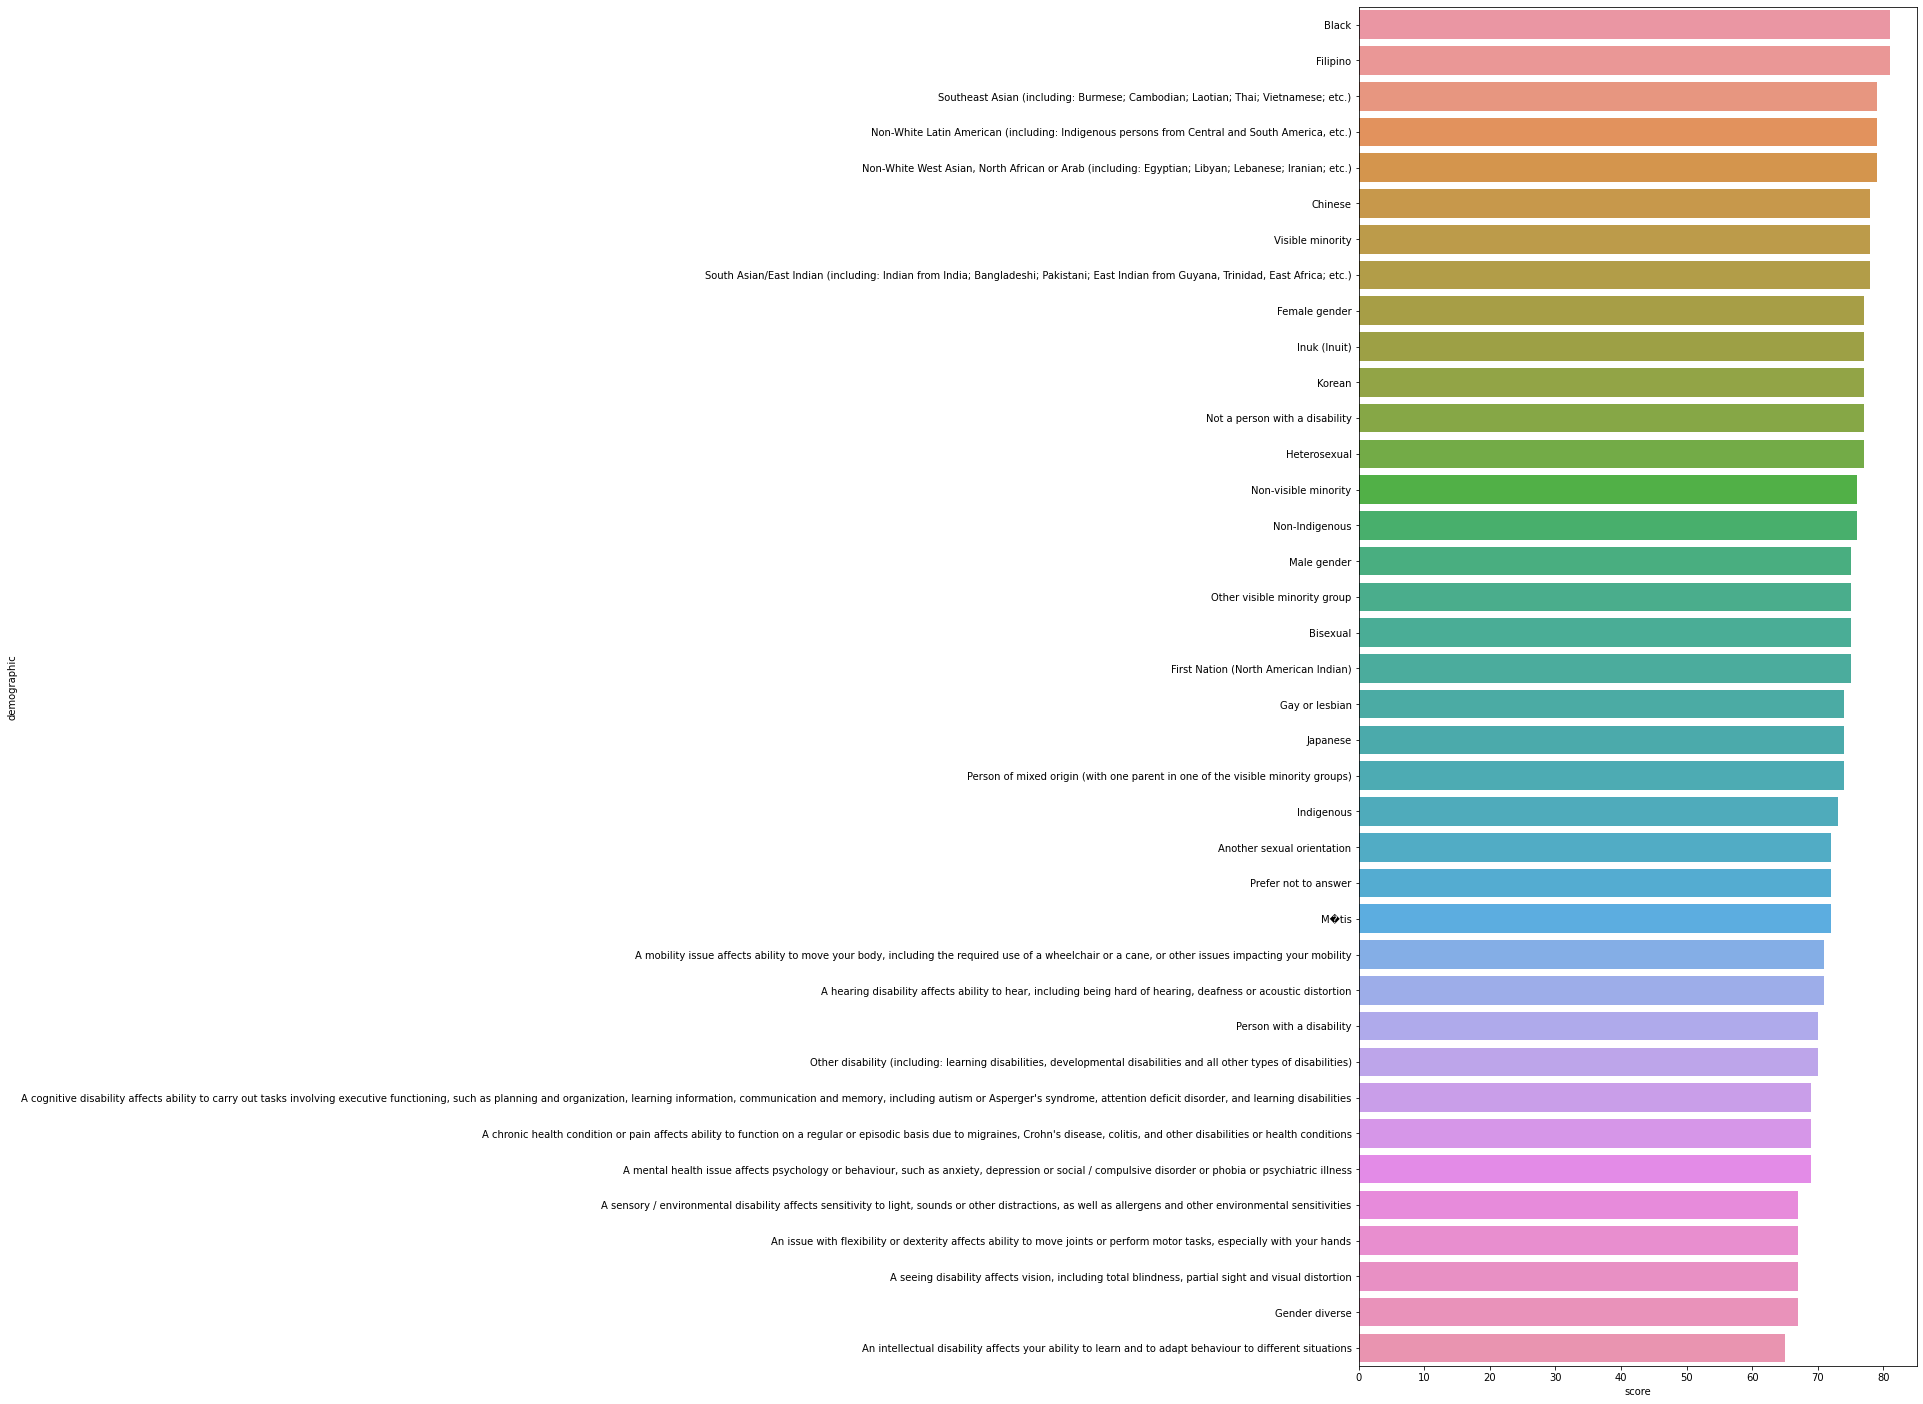

In [28]:
f, ax = plt.subplots(figsize=(10, 25))
sns.barplot(y='demographic', x='score', data=inter_data_2020_for_plot)

In [64]:
sns.heatmap(inter_data_2020_for_plot)

ValueError: could not convert string to float: 'Black'

In [ ]:
grid.map_dataframe(sns.barplot, x='demographic', y='score')